# Second cleaning path

Now I want to be sure that my gps trace are for the run path only, meaning I want to remove gps point recorded before and after the run, in case I did not stop my watch.

## Import a few modules

In [1]:
import sys
import numpy as np
import pandas as pd
import gpxpy
import gpxpy.gpx
import matplotlib.pyplot as plt
import geopy.distance
import glob
import os
import importlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pickleshare
from datetime import datetime

pd.options.mode.copy_on_write = True

sys.path.append("../my_modules")
import toolToReadGPX as ttrgpx

startingPoint_df = pd.DataFrame(columns=["name","startingDate","latitude","longitude"], 
                                index=np.arange(4))
startingPoint_df.iloc[:,0] = ["Origin","Park Girouard","Park Doyon","Ciele"]
startingPoint_df.iloc[:,1] = ["2017-09-14", "2020-06-18","2022-11-21", "2022-11-24"]
startingPoint_df.iloc[:,2] = [45.46604,  45.471895, 45.4776919, 45.489528]
startingPoint_df.iloc[:,3] = [-73.6194,  -73.613628, -73.62141,  -73.567539]

startingPoint_df.head()

,name,startingDate,latitude,longitude
0,Origin,2017-09-14,45.46604,-73.6194
1,Park Girouard,2020-06-18,45.471895,-73.613628
2,Park Doyon,2022-11-21,45.477692,-73.62141
3,Ciele,2022-11-24,45.489528,-73.567539


In [115]:
importlib.reload(ttrgpx)

# list of file names
path_csv_files = "../data/csv/"
list_csv_files  = glob.glob(path_csv_files+"*.csv")
list_csv_files.sort()

# list of panda DataFrame
list_run_df = []
for c, f in enumerate(list_csv_files):
    list_run_df.append(pd.read_csv(f)) 

# DataFrame with information about all gps traces
all_last_traces_info_df = ttrgpx.fun_create_df_from_list_df(list_run_df, list_csv_files, startingPoint_df)
all_last_traces_info_df.describe()

,indexStartingPoint
count,255.000000
mean,1.062745
std,1.231151
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,3.000000


In [10]:
all_last_traces_info_df.iloc[10:12,:]

,cumulative_distance,indexNum,numberDay,indexStartingPoint,numberRunnersPerRun
time,,,,,
2018-07-19,10406.840314,10,200,0,NaN
2018-07-26,9335.452884,11,207,0,NaN


../data/csv/RunRite_2017_09_14_downSample.csv
../data/csv/RunRite_2024_08_01_downSample.csv


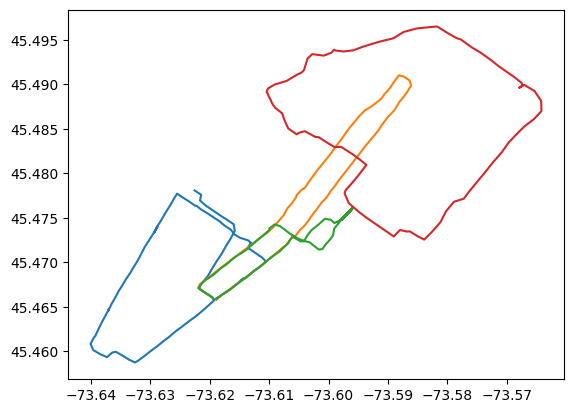

In [116]:
# test plot
print(list_csv_files[0])
plt.plot(list_run_df[0]["longitude"],list_run_df[0]["latitude"])
plt.plot(list_run_df[1]["longitude"],list_run_df[1]["latitude"])
plt.plot(list_run_df[2]["longitude"],list_run_df[2]["latitude"])
print(list_csv_files[-1])
plt.plot(list_run_df[-1]["longitude"],list_run_df[-1]["latitude"])

# Display all available traces

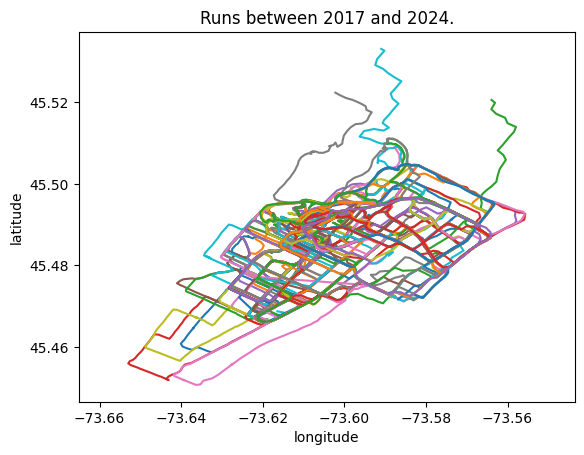

In [117]:
select_df = all_last_traces_info_df[(all_last_traces_info_df.index.year >= 2017) &
(all_last_traces_info_df.index.year <= 2024)].copy()
index_sel = np.array(select_df["indexNum"].tolist())

# plot the traces
for c, i in enumerate(index_sel):
    single_gps_trace_df = list_run_df[index_sel[c]]
    plt.plot(single_gps_trace_df["longitude"],single_gps_trace_df["latitude"])
plt.title("Runs between 2017 and 2024.")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.axis("equal")
#plt.show()
plt.savefig("../tmp/output.jpg", facecolor='w', bbox_inches="tight",
            pad_inches=0.3, transparent=True)

In [118]:
select_df = all_last_traces_info_df[(all_last_traces_info_df.cumulative_distance  >= 11000)]
select_df.head()

,cumulative_distance,indexNum,numberDay,indexStartingPoint,numberRunnersPerRun
time,,,,,
2017-10-26,11336.597066,6,299,0,NaN
2018-02-22,11105.758343,20,053,0,NaN
2018-03-08,11205.887931,22,067,0,NaN
2018-04-05,12083.663107,26,095,0,NaN
2018-05-10,11338.391504,31,130,0,NaN


I have those variables on my workspace:
+ *list_csv_files* which is a list of csv file
+ *list_run_df* which a list of gps trace of the same number of element form the csv files
+ *all_last_traces_info_df* which a DataFrame, one line per gps trace

# Check longest run

In [119]:
index_longest_run = all_last_traces_info_df["cumulative_distance"].argmax()
one_run_df   = list_run_df[index_longest_run]
print(index_longest_run,"lenght of {0:1.2f}km.".format(all_last_traces_info_df["cumulative_distance"].iloc[index_longest_run]/1000))
print("Date longest run: ",all_last_traces_info_df.index[index_longest_run])

192 lenght of 15.77km.
Date longest run:  2022-12-15 00:00:00


In [14]:
all_last_traces_info_df.iloc[11,:]

cumulative_distance    9335.452884
indexNum                        11
numberDay                      207
indexStartingPoint               0
numberRunnersPerRun            NaN
Name: 2018-07-26 00:00:00, dtype: object

# Check shortest run

In [120]:
index_shortest_run = all_last_traces_info_df["cumulative_distance"].argmin()
one_run_df   = list_run_df[index_shortest_run]
print(index_shortest_run,"lenght of {0:1.2f}km.".format(all_last_traces_info_df["cumulative_distance"].iloc[index_shortest_run]/1000))
print("Date shortest run: ",all_last_traces_info_df.index[index_shortest_run])

12 lenght of 5.75km.
Date shortest run:  2017-12-14 00:00:00


## Plot the longest run

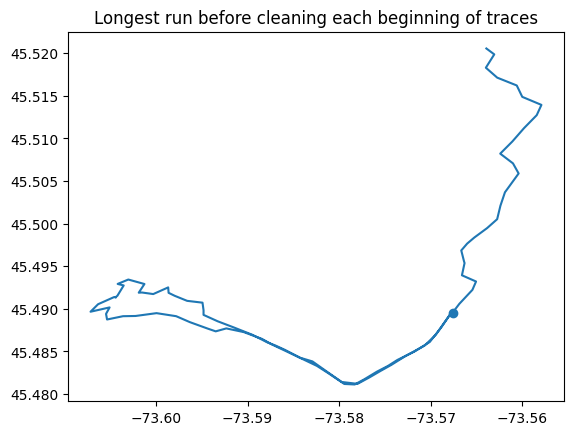

In [121]:
plt.plot(list_run_df[index_longest_run]["longitude"],list_run_df[index_longest_run]["latitude"])
ind_ = all_last_traces_info_df.indexStartingPoint.iloc[index_longest_run]
plt.scatter(startingPoint_df["longitude"][ind_],startingPoint_df["latitude"][ind_])
plt.title("Longest run before cleaning each beginning of traces");

I can see on the graph that I have recorded my run before the *official* start of the run. 

I need to *clean* this gps trace:
+ detect which points I need to remove
+ update the corresponding DataFrame
+ update the other dataFrame 

# Check average distance per year

I need to re-run those lines as my databased is evolving.

In [103]:
importlib.reload(ttrgpx)

for aa in np.arange(2017, 2025):
    mean_val = all_last_traces_info_df["cumulative_distance"][all_last_traces_info_df.index.year == aa].mean() / 1000
    print("Mean distance ran for yes {0:1.0f} is {1:02.2f}km".format(aa, mean_val))

Mean distance ran for yes 2017 is 7.95km
Mean distance ran for yes 2018 is 9.71km
Mean distance ran for yes 2019 is 9.15km
Mean distance ran for yes 2020 is 8.95km
Mean distance ran for yes 2021 is 10.13km
Mean distance ran for yes 2022 is 10.62km
Mean distance ran for yes 2023 is 11.57km
Mean distance ran for yes 2024 is 11.11km


# Do a full check up of the gps traces

And if the starting point is not correct then drop the non-necessary points

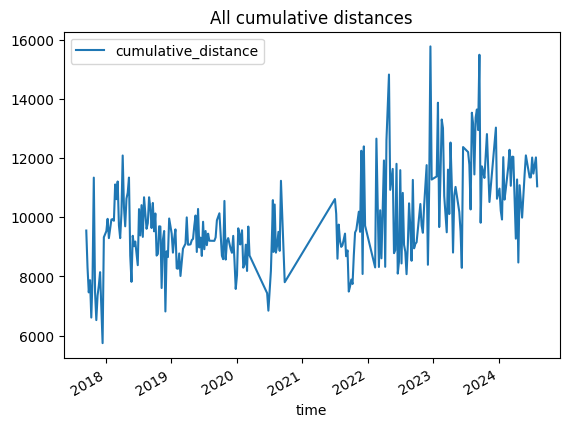

In [122]:
importlib.reload(ttrgpx)

# Relaod everything
# list of panda DataFrame and DataFrame with information about all gps traces
list_run_df = []
for c, f in enumerate(list_csv_files):
    list_run_df.append(pd.read_csv(f)) 

all_last_traces_info_df = ttrgpx.fun_create_df_from_list_df(list_run_df, list_csv_files, startingPoint_df)

all_last_traces_info_df.plot.line(y="cumulative_distance");
plt.title("All cumulative distances");

## Do the cleaning

In [123]:
for c, single_trace_df in enumerate(list_run_df):
    #--> single_trace_df is equivalent to list_run_df[c]

    # check value 0, 1, 2, 3 of starting date:
    ref_lon = startingPoint_df["longitude"][all_last_traces_info_df.iloc[c,3]] 
    ref_lat = startingPoint_df["latitude"][all_last_traces_info_df.iloc[c,3]]
    cleaned_run_df = ttrgpx.fun_clean_trace_start_end(single_trace_df, ref_lon, ref_lat)

    # update the info all traces df
    if len(cleaned_run_df) < len(single_trace_df):
        print(c, "len before/after ",len(single_trace_df),"/",len(cleaned_run_df), all_last_traces_info_df["cumulative_distance"].iloc[c] / 1000, "--->", 
              cleaned_run_df["cumulative_distance"].iloc[-1]/1000)
        list_run_df[c] = cleaned_run_df.copy()
        
        # replace cumulative value
        all_last_traces_info_df.iloc[c,0] = cleaned_run_df["cumulative_distance"].iloc[-1]

18 between 5 and 30
0 len before/after  100 / 82 9.549687208533909 ---> 7.600975544106924
22 between 5 and 30
5 len before/after  100 / 78 7.935039441068704 ---> 5.957550656792738
5 between 5 and 30
22 len before/after  100 / 95 11.20588793086001 ---> 10.62639183060549
1 between 5 and 30
48 len before/after  100 / 99 10.123486291231776 ---> 10.007031699745244
11 between 5 and 30
149 len before/after  100 / 89 9.506180399484956 ---> 8.479374212518161
23 between 5 and 30
150 len before/after  100 / 77 12.243222588821144 ---> 9.669221648860868
21 between 5 and 30
152 len before/after  100 / 79 12.391654550302869 ---> 9.874174317203448
6 between 5 and 30
154 len before/after  100 / 94 8.304750568090617 ---> 7.695389691285196
29 between 5 and 30
155 len before/after  100 / 71 12.652870246363353 ---> 8.50282781599508
20 between 5 and 30
160 len before/after  100 / 80 11.916152715092318 ---> 9.423232465671083
8 between 5 and 30
161 len before/after  100 / 92 8.32493022937451 ---> 7.6534183453

## Re display all cumulative distances after cleaning

Mean distance ran for yes 2017 is 7.67km
Mean distance ran for yes 2018 is 9.70km
Mean distance ran for yes 2019 is 9.15km
Mean distance ran for yes 2020 is 8.97km
Mean distance ran for yes 2021 is 9.04km
Mean distance ran for yes 2022 is 9.33km
Mean distance ran for yes 2023 is 11.26km
Mean distance ran for yes 2024 is 11.11km


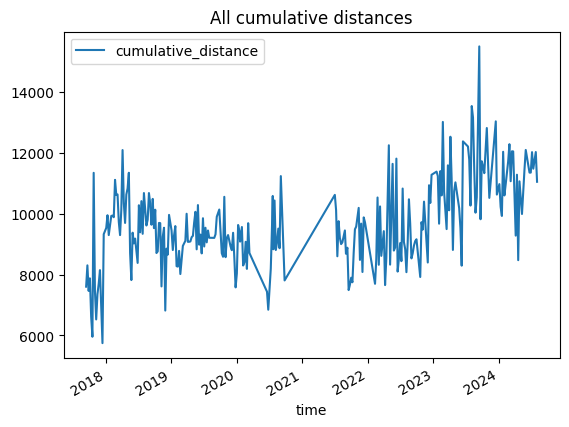

In [124]:
for aa in np.arange(2017, 2025):
    mean_val = all_last_traces_info_df["cumulative_distance"][all_last_traces_info_df.index.year == aa].mean() / 1000
    print("Mean distance ran for yes {0:1.0f} is {1:02.2f}km".format(aa, mean_val))

all_last_traces_info_df.plot.line(y="cumulative_distance")
plt.title("All cumulative distances");


## Re-check the longest run

Date shortest run:  2023-09-14 00:00:00
The shortest run happens last 15.49km and started from the Ciele location.


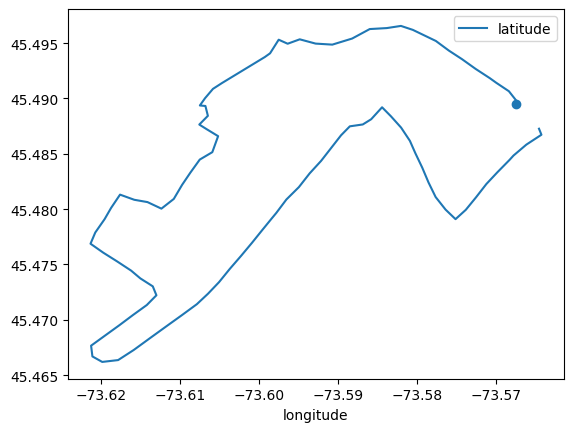

In [125]:
index_longest_run = all_last_traces_info_df["cumulative_distance"].argmax()
one_run_df         = list_run_df[index_longest_run]
one_run_df.plot(x="longitude", y="latitude")
plt.scatter(startingPoint_df["longitude"][all_last_traces_info_df["indexStartingPoint"].iloc[index_longest_run]],
            startingPoint_df["latitude"][all_last_traces_info_df["indexStartingPoint"].iloc[index_longest_run]])

# display message about the run
print("Date shortest run: ",all_last_traces_info_df.index[index_longest_run])
print("The shortest run happens last {0:1.2f}km and started from the ".format(all_last_traces_info_df["cumulative_distance"].iloc[index_longest_run]/1000)+startingPoint_df.iloc[all_last_traces_info_df.iloc[index_longest_run,3],0]+" location.")

## Show the shortest run

I migth have an issue herel, at least two:
+ I know the recorded data are for at least 9k
+ Despite reading correclty it only show a distance of 4k ish

Date shortest run:  2017-12-14 00:00:00
The shortest run happens last 5.75km and started from the Ciele location.


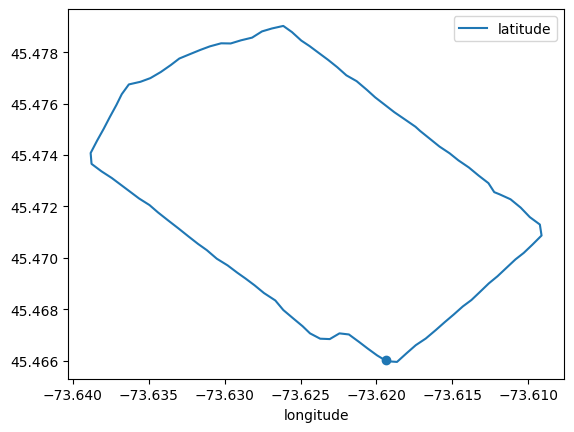

In [126]:
index_shortest_run = all_last_traces_info_df["cumulative_distance"].argmin()
one_run_df         = list_run_df[index_shortest_run]
one_run_df.plot(x="longitude", y="latitude")
plt.scatter(startingPoint_df["longitude"][all_last_traces_info_df["indexStartingPoint"].iloc[index_shortest_run]],
            startingPoint_df["latitude"][all_last_traces_info_df["indexStartingPoint"].iloc[index_shortest_run]])

# display message about the run
print("Date shortest run: ",all_last_traces_info_df.index[index_shortest_run])
print("The shortest run happens last {0:1.2f}km and started from the ".format(all_last_traces_info_df["cumulative_distance"].iloc[index_shortest_run]/1000)+startingPoint_df.iloc[all_last_traces_info_df.iloc[index_longest_run,3],0]+" location.")

../data/csv/RunRite_2017_09_14_downSample.csv
../data/csv/RunRite_2024_08_01_downSample.csv


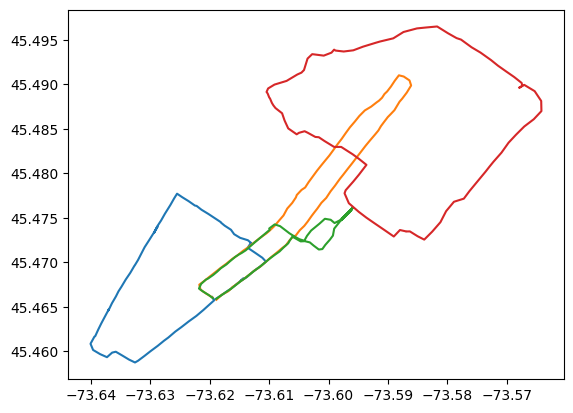

In [127]:
print(list_csv_files[0])
plt.plot(list_run_df[0]["longitude"],list_run_df[0]["latitude"])
plt.plot(list_run_df[1]["longitude"],list_run_df[1]["latitude"])
plt.plot(list_run_df[2]["longitude"],list_run_df[2]["latitude"])

print(list_csv_files[-1])
plt.plot(list_run_df[-1]["longitude"],list_run_df[-1]["latitude"])

# Display all distance per run

<Axes: xlabel='time'>

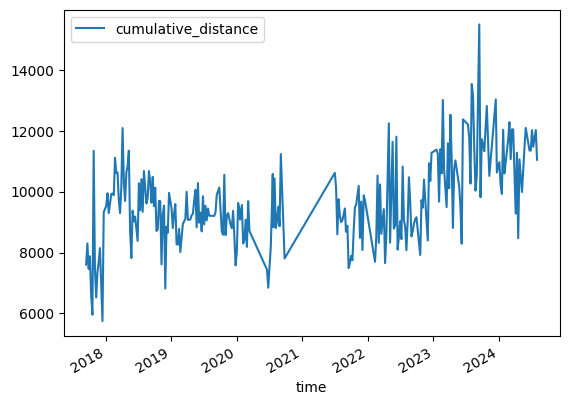

In [128]:
# All info is in all_last_traces_info_df at cumulative_distance
all_last_traces_info_df.plot.line(y="cumulative_distance")

Text(0, 0.5, 'Run distance (km)')

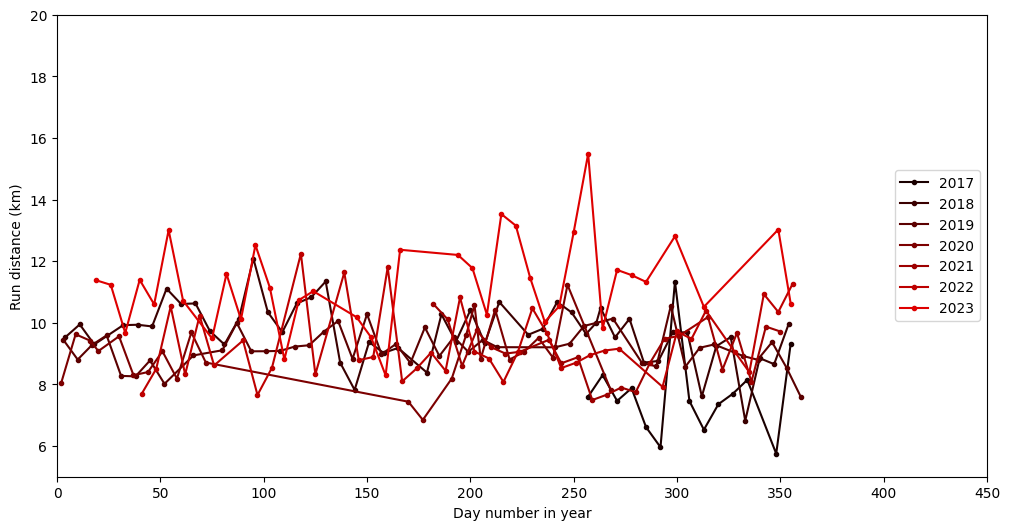

In [129]:
plt.figure(figsize=(12, 6))
vec_color = np.linspace(0.1,1,8)
for cc, aa in enumerate(np.arange(2017,2024)):
    sel_def   = all_last_traces_info_df[(all_last_traces_info_df.index.year == aa)] 
    sel_cumul = sel_def["cumulative_distance"].to_numpy() / 1000
    sel_index = sel_def["numberDay"].to_numpy()
    desired_array = [int(num_string) for num_string in sel_index]
    plt.plot(desired_array, sel_cumul,'.-',label=str(aa),color=[vec_color[cc],0,0])

plt.legend(loc=5)
plt.axis([0, 450, 5, 20])
plt.xlabel('Day number in year')
plt.ylabel('Run distance (km)')

In [136]:
print( all_last_traces_info_df.index - all_last_traces_info_df.index[0]) 

for aa in np.arange(2017,2025):
    sel_def = all_last_traces_info_df[(all_last_traces_info_df.index.year == aa)] 
    print( sel_def.index - sel_def.index[0]) 
    

TimedeltaIndex([   '0 days',  '125 days',  '202 days',  '321 days',
                 '342 days',  '349 days',  '804 days', '1070 days',
                '1392 days', '1427 days',
                ...
                '2414 days', '2428 days', '2442 days', '2449 days',
                '2470 days', '2477 days', '2484 days', '2491 days',
                '2505 days', '2512 days'],
               dtype='timedelta64[ns]', name='time', length=108, freq=None)
TimedeltaIndex(['0 days'], dtype='timedelta64[ns]', name='time', freq=None)
TimedeltaIndex(['0 days', '77 days', '196 days', '217 days', '224 days'], dtype='timedelta64[ns]', name='time', freq=None)
TimedeltaIndex(['0 days'], dtype='timedelta64[ns]', name='time', freq=None)
TimedeltaIndex(['0 days'], dtype='timedelta64[ns]', name='time', freq=None)
TimedeltaIndex([  '0 days',  '35 days', '105 days', '126 days', '133 days',
                '140 days', '147 days', '154 days'],
               dtype='timedelta64[ns]', name='time', freq=None)
Tim

# Answering questions

+ what is the longest run, when did it happen?
+ what is the average distance per year?
+ is there still some cleaning I can do? I can see at least two of my recorded runs are too small meaning my gps probably collapsed at those dates, so what are those dates?


In [137]:
index_longest_run = all_last_traces_info_df["cumulative_distance"].argmax()
one_long_run_df   = list_run_df[index_longest_run]

#one_long_run_df.plot(x="longitude", y="latitude")
#plt.scatter(startingPoint_df["longitude"][3],startingPoint_df["latitude"][3])

year   = all_last_traces_info_df.index[index_longest_run].year
month  = all_last_traces_info_df.index[index_longest_run].month 
day    = all_last_traces_info_df.index[index_longest_run].day
lenght = all_last_traces_info_df["cumulative_distance"].iloc[index_longest_run] / 1000

print("The longest did happen the Thursday {0:1.0f}-{1:1.0f}-{2:1.0f} and we ran {3:1.2f}km".format(year, month, day, lenght))

The longest did happen the Thursday 2023-9-14 and we ran 15.49km


# Some pre conclusions

From there we have:
+ loaded csv file to DataFrame for each gps trace
+ cleaned the gps trace to avoid recorded points before each race assuming I stop recording when the run was over
+ delivered some insite about all the runs I have the gps traces

# What's next?
I need to save some variables such that I can reload them in another notebook.

I can continue on generating dataviz.

In [138]:
all_last_traces_info_df.sort_values(by=['cumulative_distance'])

,cumulative_distance,indexNum,numberDay
time,,,
2022-09-01,6271.900306,33,244
2022-09-29,6962.611491,37,272
2017-09-15,7600.975544,0,258
2022-02-24,7749.861883,17,055
2022-05-05,7887.698429,25,125
...,...,...,...
2023-12-15,13025.900851,82,349
2023-08-10,13151.353305,70,222
2023-08-03,13527.938909,69,215


# Display many gps traces in one graph

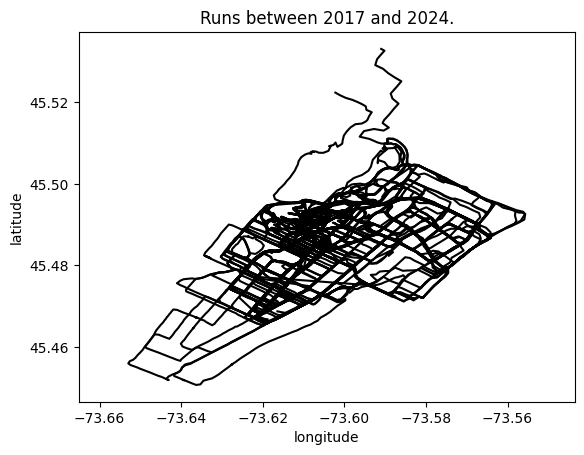

In [130]:
# This below
select_df = all_last_traces_info_df[(all_last_traces_info_df.index.year >= 2017) &
(all_last_traces_info_df.index.year <= 2024)].copy()
index_sel = np.array(select_df["indexNum"].tolist())

# plot the traces
for c, i in enumerate(index_sel):
    single_gps_trace_df = list_run_df[index_sel[c]]
    plt.plot(single_gps_trace_df["longitude"],single_gps_trace_df["latitude"],'k')

plt.title("Runs between 2017 and 2024.")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.axis("equal")
#plt.show()
plt.savefig("../tmp/output.jpg", facecolor='w', bbox_inches="tight",
            pad_inches=0.3, transparent=True)


# Idea of visualization

I could:
+ visualize run as polygon area
+ create group of runs an return convexhul
+ generate a date colum corresponding to the staring point